In [1]:
import os
import random as rn
import datetime

from math import pi

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

os.environ["PYTHONHASHSEED"] = "0"
np.random.seed(42)
rn.seed(12345)
tf.random.set_seed(3)

/home/kronheim/.local/share/virtualenvs/Honors-7_jeLJAf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kronheim/.local/share/virtualenvs/Honors-7_jeLJAf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kronheim/.local/share/virtualenvs/Honors-7_jeLJAf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16"

In the cell below, set dataFileName to be the datafile used, and networkName to be the name of the network you want predictions from.

In [2]:
dataFileName = "gitParticleDataClean.npy"
networkName = "gitClassification1"

The cell below extracts the dataset and makes the predictions

In [3]:
newPDGID = {-11.0:[1,0,0,0,0,0,0,0,0,0,0], 
            -13.0:[0,1,0,0,0,0,0,0,0,0,0], 
            -211:[0,0,1,0,0,0,0,0,0,0,0], 
            22.0:[0,0,0,1,0,0,0,0,0,0,0], 
            1.0:[0,0,0,0,1,0,0,0,0,0,0], 
            0.0:[0,0,0,0,0,1,0,0,0,0,0], 
            2.0:[0,0,0,0,0,0,1,0,0,0,0], 
            130.0:[0,0,0,0,0,0,0,1,0,0,0], 
            211.0:[0,0,0,0,0,0,0,0,1,0,0], 
            13.0:[0,0,0,0,0,0,0,0,0,1,0], 
            11.0:[0,0,0,0,0,0,0,0,0,0,1]};

dataInitial=np.load(dataFileName)
data=[]


jetPX = 0.0 
jetPY = 0.0
jetPZ = 0.0
jetE = 0.0
firstPt = 0.0
firstEta = 0.0
firstPhi = 0.0
firstE = 0.0
firstVx=0
firstVy=0
firstVz=0
currentX=0.0
jetSize=[]
#Get the dataset
for x in range(int(len(dataInitial))):
    temp=[]
    correct=0
    weight=1
    if(dataInitial[x,1] !=0 or dataInitial[x,2]!=0 or dataInitial[x,3]!=0 or dataInitial[x,4]!=0 or dataInitial[x,5]!=0 or dataInitial[x,0]!=0):
        weight = 5.14
        correct=1
    if(dataInitial[x,0]==1):
        jetPX = 0.01 
        jetPY = 0.0
        jetPZ = 0.0
        jetE = 0.01
        jetSize.append(x-currentX)
        currentX=x
        
        firstVx=dataInitial[x,10]
        firstVy=dataInitial[x,11]
        firstVz=dataInitial[x,12]
        
        firstPT = (dataInitial[x,6]**2 + dataInitial[x,7]**2)**0.5
        firstPhi = 0.0
        firstEta = 0.0
        if(firstPT != 0):
            firstPhi = np.arcsin(dataInitial[x,7]/firstPT)
            firstEta = np.arcsinh(dataInitial[x,8]/firstPT)
        firstE = dataInitial[x,9]
        
        
    jetPT = (jetPX**2 + jetPY**2)**0.5
    jetPhi = 0.0
    jetEta = 0.0
    if(jetPT!=0):
        jetPhi = np.arcsin(jetPY/jetPT)
        jetEta = np.arcsinh(jetPZ/jetPT)
    particlePT = (dataInitial[x,6]**2 + dataInitial[x,7]**2)**0.5
    particlePhi = 0.0
    particleEta = 0.0
    if(particlePT != 0):
        particlePhi = np.arcsin(dataInitial[x,7]/particlePT)
        particleEta = np.arcsinh(dataInitial[x,8]/particlePT)
    
    temp.append(np.log(firstPT))
    temp.append(firstEta)
    temp.append(firstPhi)
    temp.append(np.log(firstE))
    temp.append(np.cbrt(firstVx))
    temp.append(np.cbrt(firstVy))
    temp.append(np.cbrt(firstVz))
    temp.append(np.log(jetPT))
    temp.append(jetEta)
    temp.append(jetPhi)
    temp.append(np.log(jetE))
    temp.append(np.log(particlePT))
    temp.append(particleEta)
    temp.append(particlePhi)
    temp.append(np.log(dataInitial[x,9]))
    temp.append(np.cbrt(dataInitial[x,10]))
    temp.append(np.cbrt(dataInitial[x,11]))
    temp.append(np.cbrt(dataInitial[x,12]))
    temp= temp + newPDGID[dataInitial[x,13]]
    jetPX += dataInitial[x,1]
    jetPY += dataInitial[x,2]
    jetPZ += dataInitial[x,3]
    jetE += dataInitial[x,4]
    temp.append(correct)
    temp.append(weight)
    data.append(np.array(temp))

data=np.array(data).T

meanX=np.mean(data[7])
meanY=np.mean(data[8])
meanZ=np.mean(data[9])
meanE=np.mean(data[10])

meanVx=np.mean(data[15])
meanVy=np.mean(data[16])
meanVz=np.mean(data[17])

sdX=np.std(data[7])
sdY=np.std(data[8])
sdZ=np.std(data[9])
sdE=np.std(data[10])

sdVx=np.std(data[15])
sdVy=np.std(data[16])
sdVz=np.std(data[17])

data[0]=(data[0]-meanX)/sdX
data[1]=(data[1]-meanY)/sdY
data[2]=(data[2]-meanZ)/sdZ
data[3]=(data[3]-meanE)/sdE
data[4]=(data[4]-meanVx)/sdVx
data[5]=(data[5]-meanVy)/sdVy
data[6]=(data[6]-meanVz)/sdVz

data[7]=(data[7]-meanX)/sdX
data[8]=(data[8]-meanY)/sdY
data[9]=(data[9]-meanZ)/sdZ
data[10]=(data[10]-meanE)/sdE
data[11]=(data[11]-meanX)/sdX
data[12]=(data[12]-meanY)/sdY
data[13]=(data[13]-meanZ)/sdZ
data[14]=(data[14]-meanE)/sdE

data[15]=(data[15]-meanVx)/sdVx
data[16]=(data[16]-meanVy)/sdVy
data[17]=(data[17]-meanVz)/sdVz


inputData=data[0:29].T
outputData=data[29:31].T

#Randomly pick an 80-10-10 train-validation-test split
trainIn, valIn, trainOut, valOut = train_test_split(inputData,
                                                    outputData,
                                                    test_size=1/9,
                                                    random_state=42)

trainIn = trainIn.astype(np.float32)
valIn = valIn.astype(np.float32)
trainOut = trainOut.astype(np.float32)
valOut =  valOut.astype(np.float32)

weights=trainOut.T[1]
trainOut=trainOut.T[0]
valOut=valOut.T[0]

model=tf.keras.models.load_model(networkName)

predictions=model.predict(x=valIn,batch_size=8192)


The cell below makes the actual roc curves, as well as many other related curves

/home/kronheim/.local/share/virtualenvs/Honors-7_jeLJAf/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


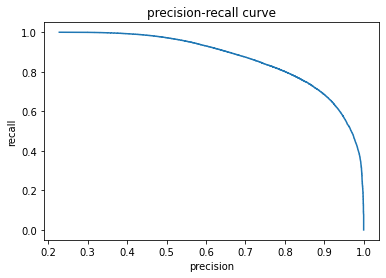

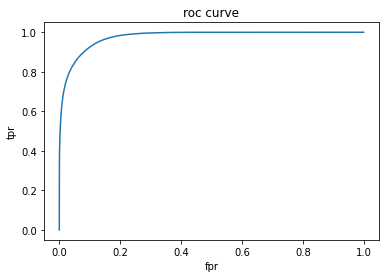

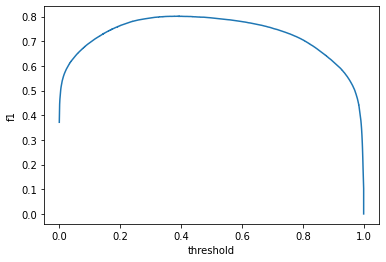

/home/kronheim/.local/share/virtualenvs/Honors-7_jeLJAf/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


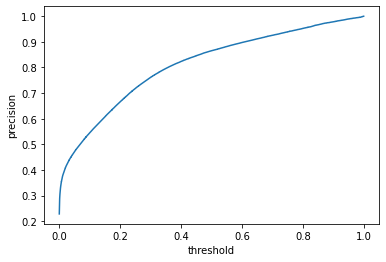

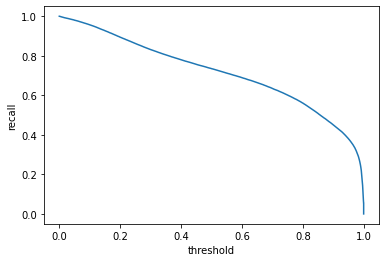

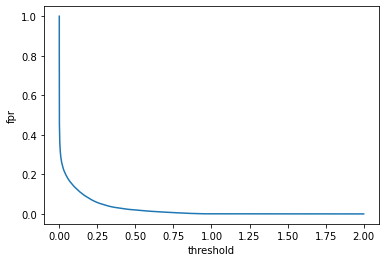

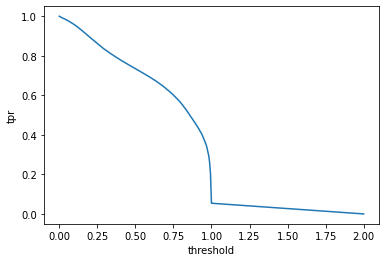

best F1: 0.8013846048392624
best cutoff: 0.3881155252456665


In [5]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
precision, recall, cutoff = precision_recall_curve(valOut.tolist(), np.squeeze(predictions.T).tolist())
plt.figure()
plt.plot(precision, recall)
plt.xlabel("precision")
plt.ylabel("recall")
plt.title("precision-recall curve")
plt.plot()

fpr, tpr, cutoff2 = roc_curve(valOut, predictions)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc curve")
plt.plot()

plt.figure()
plt.plot(cutoff, 2/(1/precision[1:] + 1/recall[1:]))
plt.xlabel("threshold")
plt.ylabel("f1")
plt.show()
bestCutoff=0
bestF1=0.0
for x in range(len(cutoff)):
    newF1=2/(1/precision[1+x] + 1/recall[1+x])
    if(newF1>bestF1):
        bestCutoff=cutoff[x]
        bestF1 = newF1


plt.figure()
plt.plot(cutoff, precision[1:])
plt.xlabel("threshold")
plt.ylabel("precision")
plt.show()

plt.figure()
plt.plot(cutoff, recall[1:])
plt.xlabel("threshold")
plt.ylabel("recall")
plt.show()

plt.figure()
plt.plot(cutoff2, fpr[0:])
plt.xlabel("threshold")
plt.ylabel("fpr")
plt.show()

plt.figure()
plt.plot(cutoff2,tpr[0:])
plt.xlabel("threshold")
plt.ylabel("tpr")
plt.show()
print("best F1:", bestF1)
print("best cutoff:", bestCutoff)

The final cell calculates the area under the roc curve.

In [6]:
model.evaluate(x=valIn, y=valOut,batch_size=2048)
aoc_roc = roc_auc_score(valOut, predictions)
print("aoc_roc:", aoc_roc)

510739/510739 [==============================] - 1s 2us/sample - loss: 0.1328 - accuracy: 0.9448 - precision_1: 0.8655 - recall_1: 0.7350
aoc_roc: 0.9759823701421425
